### Import necessary libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### Read in the data

In [35]:
no_show_data = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [36]:
no_show_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
no_show_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [38]:
no_show_data.AppointmentDay.tail()

110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, dtype: object

In [39]:
# Lets change the Appointmentday column and Scheduleday column to datetime format
no_show_data.ScheduledDay = pd.to_datetime(no_show_data.ScheduledDay)

In [40]:
no_show_data.AppointmentDay = pd.to_datetime(no_show_data.AppointmentDay)

In [41]:
# Checking for null values in the dataset
no_show_data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [42]:
#Checking for duplicated rows in the dataset
no_show_data[no_show_data.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [43]:
# Check that all columns have correct data type
no_show_data.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

### Exploratory Data Analysis

In [44]:
# Shows a brief information about the data
no_show_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [45]:
# Shows summary statistics for all the numeric columns in the dataset
no_show_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [46]:
# This gives an Overview of the correlation figure of the numeric columns against each other
no_show_data.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


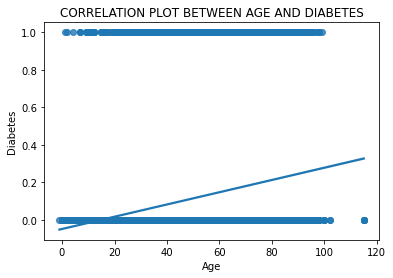

In [47]:
# A quick correlation plot between age and diabetes 
# The result shows a weak positive correlation, which means there is the old age have a slight chance of having diabetes 
plt.title("Correlation plot between Age and Diabetes".upper())
sns.regplot(x= no_show_data.Age, y= no_show_data.Diabetes);

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
In this Analysis we will be dealing with an offical age of 18 and above

In [48]:
# Query for age that is 18 and above
matured_age = no_show_data.query("Age >= 18")

In [49]:
matured_age.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No


In [50]:
# Lets group the matured dataset by Gender
gender = matured_age.groupby("Gender")

In [51]:
# Let's aggregate the matured dataset by Scholarship to know which gender has more scholarship
# The table below shows that the Female gender has the highest number of scholarships
aggregate = matured_age.groupby(["Gender", "Scholarship"]).agg({"Scholarship": "sum"})
aggregate

Scholarship
Gender Scholarship             
F      0                      0
       1                   7133
M      0                      0
       1                    666

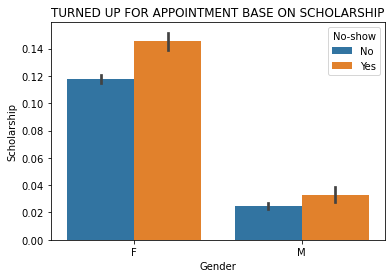

In [52]:
# Let's visualize the matured dataset: To see which gender turned up for appointment based on scholarship given
# The female with scholarship gender tend to show up for appointment more than the male gender
plt.title("Turned up for Appointment base on Scholarship".upper())
sns.barplot(data=matured_age, x="Gender", y= "Scholarship", hue= "No-show");

In [53]:
# Lets categorize the dateset into those that received SMS and those that did not received 
received_sms = matured_age.query("SMS_received == 1")
no_sms_received_sms = matured_age.query("SMS_received == 0")

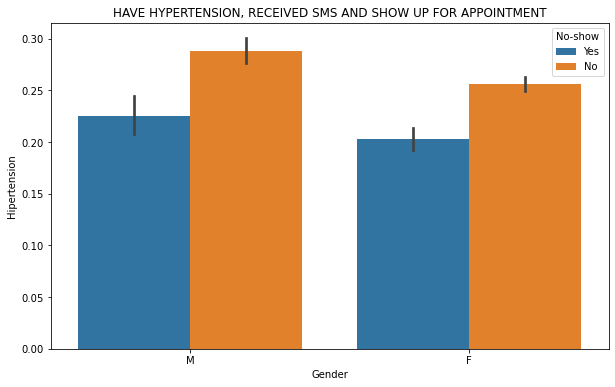

In [54]:
# Lets visualize the gender that has hypertension, received SMS and still show up for appointment
plt.figure(figsize=(10, 6))
plt.title("Have Hypertension, received SMS and show up for Appointment".upper())
sns.barplot(data = received_sms, x="Gender", y="Hipertension", hue= "No-show" );

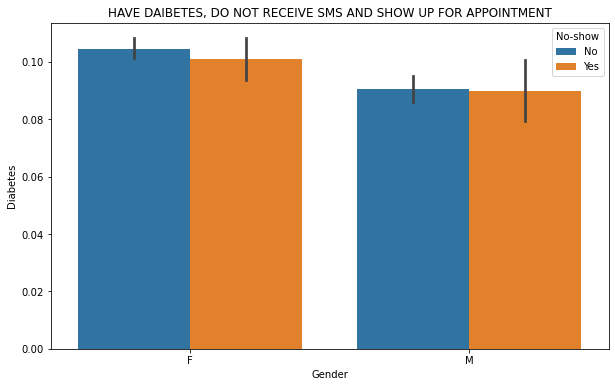

In [55]:
# Lets visualize the gender that has diabetes, do not received SMS and still show up for appointment
plt.figure(figsize=(10, 6))
plt.title("Have Daibetes, Do not receive SMS and show up for Appointment".upper())

sns.barplot(data = no_sms_received_sms, x="Gender", y="Diabetes", hue= "No-show" );

In [56]:
male_gender = gender.get_group("M")

In [57]:
# Create a column called time taken to calculate the duration between Schedule day and appointmrnt day
matured_age["Time_taken"] = matured_age["AppointmentDay"] - matured_age["ScheduledDay"]

C:\Users\TEMITOPE\AppData\Local\Temp\ipykernel_9960\2539591748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matured_age["Time_taken"] = matured_age["AppointmentDay"] - matured_age["ScheduledDay"]


In [58]:
matured_age.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Time_taken
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,-1 days +05:21:52
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,-1 days +07:51:33
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,-1 days +07:40:56
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,-1 days +07:52:37
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No,1 days 15:23:09


### Time Series Analysis of Appointment
One fact that is common to all the line chart, is that there is no appointment on "2016-05-15"

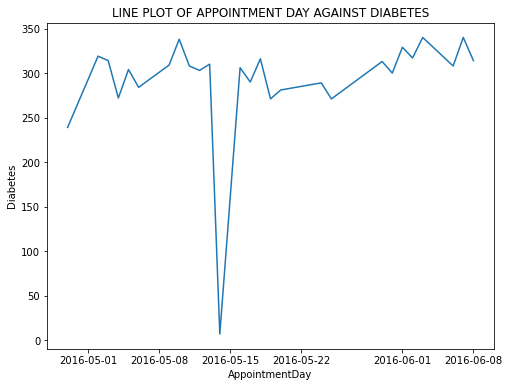

In [59]:
plt.figure(figsize=[8,6])
plt.title("line plot of Appointment day against Diabetes".upper())
time_data = matured_age.groupby(by = "AppointmentDay", as_index=False)["Diabetes"].sum()
sns.lineplot(data=time_data, x="AppointmentDay", y="Diabetes");

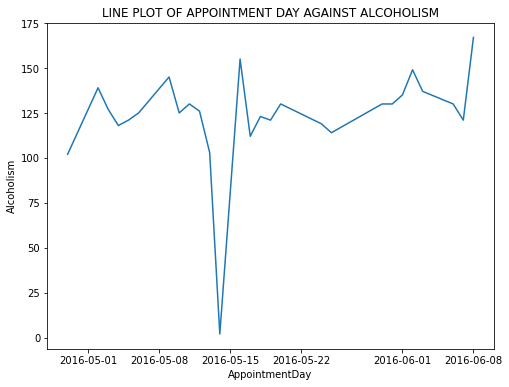

In [60]:
plt.figure(figsize=[8,6])
plt.title("line plot of Appointment day against Alcoholism".upper())
time_data_1 = matured_age.groupby(by = "AppointmentDay", as_index=False)["Alcoholism"].sum()
sns.lineplot(data=time_data_1, x="AppointmentDay", y="Alcoholism");

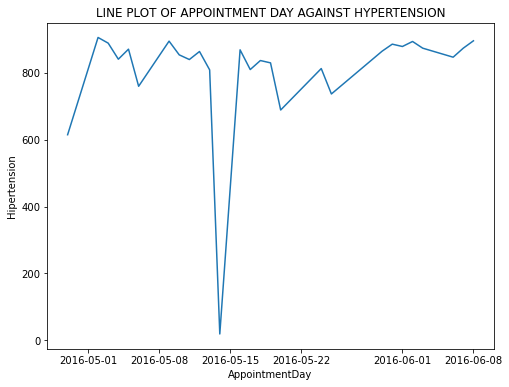

In [61]:
plt.figure(figsize=[8,6])
plt.title("line plot of Appointment day against Hypertension".upper())
time_data_2 = matured_age.groupby(by = "AppointmentDay", as_index=False)["Hipertension"].sum();
sns.lineplot(data=time_data_2, x="AppointmentDay", y="Hipertension");
#Hipertension

In [ ]:
# Does people scholarship go for appointment
# Does people below have 18 have diabeties
# do a value count for age
# Does location have effect on appointment?